In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df= pd.read_csv('bank-additional-full.csv', sep=';', encoding='utf-8')
# Results for all clients
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


There are 41,188 clients who have been contacted.

In [2]:
# Dropping unnecessary columns
# df=df.drop('emp.var.rate',axis=1)
# df=df.drop('cons.price.idx',axis=1)
# df=df.drop('cons.conf.idx',axis=1)
# df=df.drop('euribor3m',axis=1)
# df=df.drop('nr.employed',axis=1)
# df['pdays']=df['pdays'].replace(999,0)

In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

Average number of contacts: Current campaign = 2-3, Previous campaign = 0 meaning for current campaign, majority have not been contacted in previous campaign = 35563/41188 = 86.34%


In [5]:
#Analyse previous campaign
#Remove all entries who were not contacted in previous campaign
df_previous=df[df['poutcome']!='nonexistent']
df_previous

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no


Success rate of previous campaign = 32.29%

In [6]:
#Analyse success factors
df_previous_job=df_previous.groupby('job')['poutcome'].value_counts().unstack()
df_previous_job['success_rate']=df_previous_job['success']/(df_previous_job['success']+df_previous_job['failure'])
df_previous_job

poutcome,failure,success,success_rate
job,,,
admin.,1091,428,0.281764
blue-collar,886,119,0.118408
entrepreneur,154,25,0.139665
housemaid,74,38,0.339286
management,331,95,0.223005
retired,230,158,0.407216
self-employed,145,30,0.171429
services,448,70,0.135135
student,163,118,0.419929


Top 3 jobs with highest success rates = student (41.99%), retired (40.72%), unemployed (39.74%)
Top 3 jobs with most successes = admin. (428), technician (211), retired (158)

In [7]:
#Conversion rate (previous campaign = failure, current campaign = success)
df_converted=df_previous[df_previous['poutcome']=='failure']
df_converted=df_converted[df_converted['y']=='yes']
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, 24019 to 41173
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             605 non-null    int64  
 1   job             605 non-null    object 
 2   marital         605 non-null    object 
 3   education       605 non-null    object 
 4   default         605 non-null    object 
 5   housing         605 non-null    object 
 6   loan            605 non-null    object 
 7   contact         605 non-null    object 
 8   month           605 non-null    object 
 9   day_of_week     605 non-null    object 
 10  duration        605 non-null    int64  
 11  campaign        605 non-null    int64  
 12  pdays           605 non-null    int64  
 13  previous        605 non-null    int64  
 14  poutcome        605 non-null    object 
 15  emp.var.rate    605 non-null    float64
 16  cons.price.idx  605 non-null    float64
 17  cons.conf.idx   605 non-null    fl

Conversion rate of current campaign = 605/4252 = 14.23%

In [8]:
#Loss rate (previous campaign = success, current campaign = failure)
df_loss=df_previous[df_previous['poutcome']=='success']
df_loss=df_loss[df_loss['y']=='no']
df_loss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 24108 to 41182
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             479 non-null    int64  
 1   job             479 non-null    object 
 2   marital         479 non-null    object 
 3   education       479 non-null    object 
 4   default         479 non-null    object 
 5   housing         479 non-null    object 
 6   loan            479 non-null    object 
 7   contact         479 non-null    object 
 8   month           479 non-null    object 
 9   day_of_week     479 non-null    object 
 10  duration        479 non-null    int64  
 11  campaign        479 non-null    int64  
 12  pdays           479 non-null    int64  
 13  previous        479 non-null    int64  
 14  poutcome        479 non-null    object 
 15  emp.var.rate    479 non-null    float64
 16  cons.price.idx  479 non-null    float64
 17  cons.conf.idx   479 non-null    fl

Loss rate of current campaign = 479/1373 = 34.89%

In [9]:
#Return rate (previous campaign = success, current campaign = success)
df_return=df_previous[df_previous['poutcome']=='success']
df_return=df_return[df_return['y']=='yes']
df_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 24613 to 41178
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             894 non-null    int64  
 1   job             894 non-null    object 
 2   marital         894 non-null    object 
 3   education       894 non-null    object 
 4   default         894 non-null    object 
 5   housing         894 non-null    object 
 6   loan            894 non-null    object 
 7   contact         894 non-null    object 
 8   month           894 non-null    object 
 9   day_of_week     894 non-null    object 
 10  duration        894 non-null    int64  
 11  campaign        894 non-null    int64  
 12  pdays           894 non-null    int64  
 13  previous        894 non-null    int64  
 14  poutcome        894 non-null    object 
 15  emp.var.rate    894 non-null    float64
 16  cons.price.idx  894 non-null    float64
 17  cons.conf.idx   894 non-null    fl

Return rate of current campaign = 894/1373 = 65.11%

In [10]:
#Double failure rate (previous campaign = failure, current campaign = failure)
df_double_fail=df_previous[df_previous['poutcome']=='failure']
df_double_fail=df_double_fail[df_double_fail['y']=='no']
df_double_fail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3647 entries, 24013 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3647 non-null   int64  
 1   job             3647 non-null   object 
 2   marital         3647 non-null   object 
 3   education       3647 non-null   object 
 4   default         3647 non-null   object 
 5   housing         3647 non-null   object 
 6   loan            3647 non-null   object 
 7   contact         3647 non-null   object 
 8   month           3647 non-null   object 
 9   day_of_week     3647 non-null   object 
 10  duration        3647 non-null   int64  
 11  campaign        3647 non-null   int64  
 12  pdays           3647 non-null   int64  
 13  previous        3647 non-null   int64  
 14  poutcome        3647 non-null   object 
 15  emp.var.rate    3647 non-null   float64
 16  cons.price.idx  3647 non-null   float64
 17  cons.conf.idx   3647 non-null   f

Double failure rate of current campaign = 3647/4252 = 85.77%

In [50]:
df_age_count=df['age'].value_counts()
df_age_count.head(40).sort_index()

age
21     102
22     137
23     226
24     463
25     598
26     698
27     851
28    1001
29    1453
30    1714
31    1947
32    1846
33    1833
34    1745
35    1759
36    1780
37    1475
38    1407
39    1432
40    1161
41    1278
42    1142
43    1055
44    1011
45    1103
46    1030
47     928
48     979
49     839
50     875
51     754
52     779
53     733
54     684
55     648
56     704
57     646
58     576
59     463
60     283
Name: count, dtype: int64

In [12]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [13]:
df_admin=df[df['job'] == 'admin.']
df_admin2=df_admin[df_admin['y']=='yes']
df_admin2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,37.968935,517.414201,2.058432,773.512574,0.510355,-1.383210,93.319537,-39.545488,1.965078,5087.736760
std,10.057521,375.292827,1.712147,416.174946,0.870546,1.570323,0.674692,6.194037,1.669565,85.423296
min,21.000000,64.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,30.000000,245.000000,1.000000,999.000000,0.000000,-2.900000,92.893000,-46.200000,0.827000,5008.700000
50%,35.000000,409.500000,1.000000,999.000000,0.000000,-1.800000,93.200000,-40.300000,1.260000,5076.200000
75%,45.000000,687.250000,2.000000,999.000000,1.000000,-1.100000,93.918000,-34.800000,1.811000,5099.100000
max,72.000000,2692.000000,17.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
df_technician=df[df['job'] == 'technician']
df_technician2=df_technician[df_technician['y']=='yes']
df_technician2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,37.746575,553.190411,2.046575,793.676712,0.505479,-1.102055,93.374286,-40.003836,2.239584,5099.017123
std,9.281168,380.371713,1.588892,402.339117,0.856251,1.642093,0.666668,6.183281,1.781735,91.099348
min,20.000000,63.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,31.000000,259.250000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.879000,5017.500000
50%,35.000000,459.500000,2.000000,999.000000,0.000000,-1.800000,93.369000,-40.300000,1.270000,5099.100000
75%,43.000000,748.000000,2.000000,999.000000,1.000000,1.100000,93.918000,-36.100000,4.857000,5195.800000
max,70.000000,3643.000000,17.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,5.000000,5228.100000


In [15]:
df_bluecollar=df[df['job'] == 'blue-collar']
df_bluecollar2=df_bluecollar[df_bluecollar['y']=='yes']
df_bluecollar2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,39.200627,732.673981,2.156740,899.324451,0.269592,-0.487774,93.491480,-41.770846,2.915715,5139.410658
std,9.516764,442.963058,1.977235,298.742566,0.610775,1.646863,0.621396,4.792779,1.858400,80.389323
min,21.000000,78.000000,1.000000,2.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,414.250000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.266000,5099.100000
50%,38.000000,664.000000,2.000000,999.000000,0.000000,-1.400000,93.444000,-42.700000,1.466000,5099.100000
75%,46.000000,943.750000,3.000000,999.000000,0.000000,1.400000,93.994000,-37.500000,4.957000,5228.100000
max,70.000000,4199.000000,23.000000,999.000000,4.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
df_age=df[df['age']>=26]
df_age=df_age[df_age['age']<35]
df_age=df_age[df_age['y']=='yes']
df_age.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,30.404323,553.474889,2.055944,814.007629,0.433566,-1.214304,93.344087,-40.526637,2.132141,5098.125747
std,2.432400,405.657855,1.613610,386.782077,0.808002,1.578390,0.649925,6.006245,1.713982,85.793319
min,26.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,29.000000,251.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.879000,5017.500000
50%,31.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.800000,1.270000,5099.100000
75%,33.000000,740.000000,3.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.153000,5191.000000
max,34.000000,3643.000000,17.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
# Results for all subscribers
df_y=df[df['y'] == 'yes']
df_y

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


There are 4640 clients who subscribed for the term deposit.

In [18]:
df_y_job=df_y.groupby('job')['marital'].value_counts().unstack()
df_y_job

marital,divorced,married,single,unknown
job,,,,
admin.,132.0,652.0,566.0,2.0
blue-collar,53.0,421.0,161.0,3.0
entrepreneur,14.0,88.0,21.0,1.0
housemaid,16.0,74.0,16.0,NaN
management,39.0,226.0,63.0,NaN
retired,92.0,329.0,12.0,1.0
self-employed,16.0,82.0,51.0,NaN
services,33.0,166.0,124.0,NaN
student,3.0,8.0,264.0,NaN


In [19]:
df_y_job=df_y.groupby('job')['education'].value_counts().unstack()
df_y_job

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,10.0,8.0,42.0,382.0,NaN,49.0,823.0,38.0
blue-collar,123.0,107.0,240.0,94.0,NaN,41.0,9.0,24.0
entrepreneur,7.0,9.0,12.0,16.0,1.0,9.0,66.0,4.0
housemaid,51.0,5.0,3.0,14.0,NaN,11.0,17.0,5.0
management,5.0,10.0,11.0,17.0,NaN,8.0,257.0,20.0
retired,185.0,10.0,19.0,62.0,2.0,57.0,66.0,33.0
self-employed,3.0,1.0,18.0,8.0,1.0,20.0,96.0,2.0
services,7.0,20.0,29.0,203.0,NaN,19.0,26.0,19.0
student,8.0,7.0,35.0,114.0,NaN,17.0,35.0,59.0


/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/2227190250.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=job_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


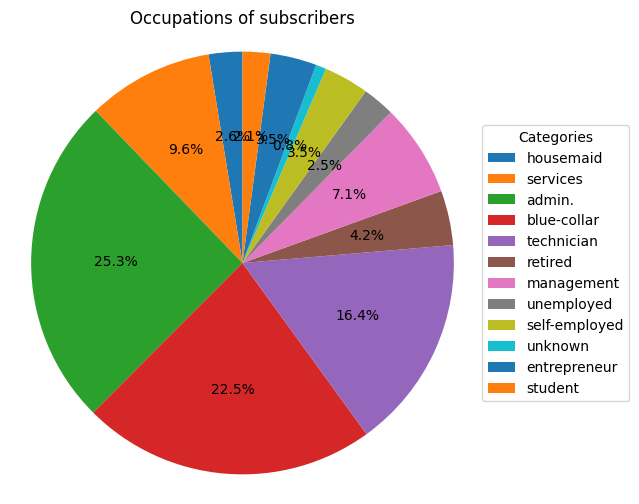

In [47]:
job_count=Counter(df['job'])
job_count
job_label = list(job_count.keys())
job_size = list(job_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(job_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=job_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Occupations of subscribers')
plt.axis('equal')
plt.show()

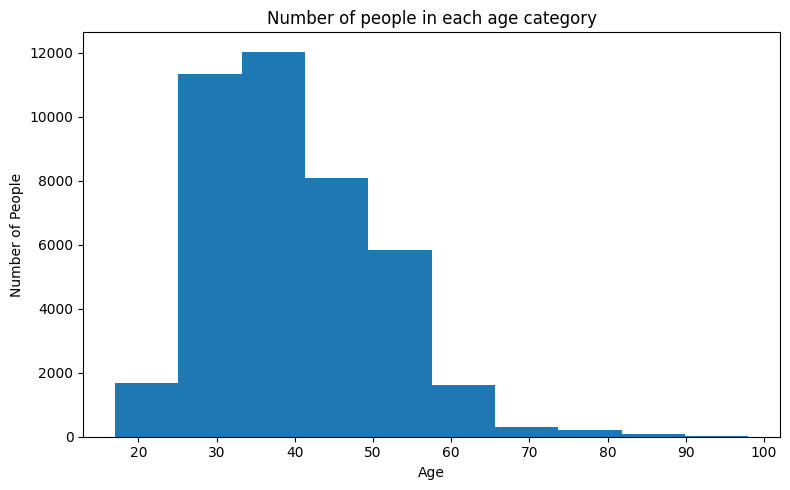

In [49]:
age_count=df['age']
plt.figure(figsize = (8,5))
plt.hist(age_count, bins = 10)
plt.title('Number of people in each age category')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/1231861314.py:9: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=education_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


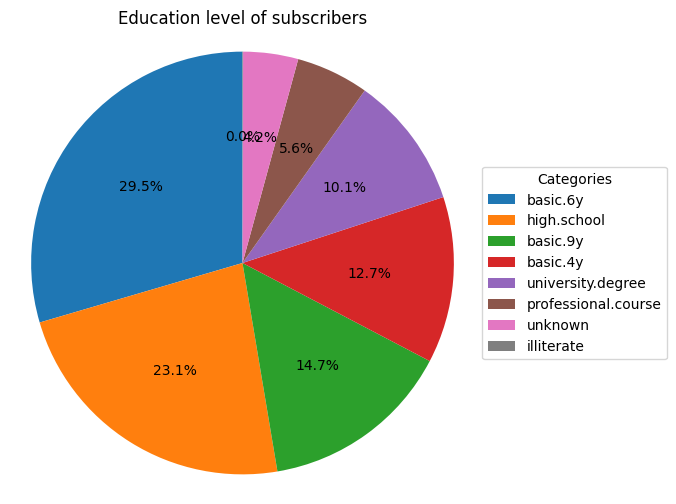

In [51]:
education_count=Counter(df['education'])
education_count
education_label = list(education_count.keys())
education_size = list(education_count.values())
sorted_data = sorted(zip(education_size, education_y_label), reverse=True)
education_size, education_label = zip(*sorted_data)
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(education_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=education_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Education level of subscribers')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/4133574244.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=job_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


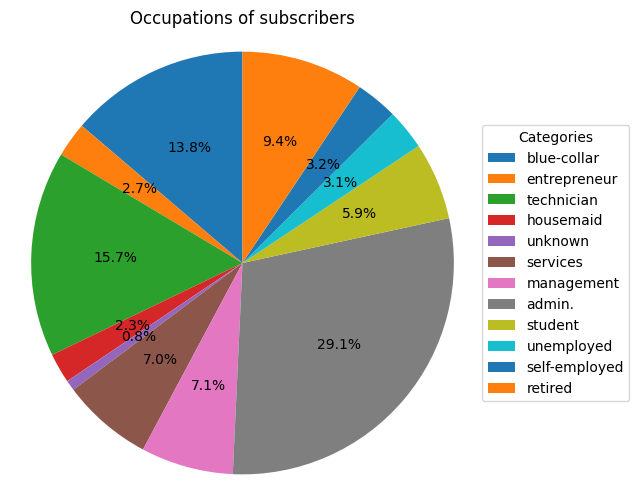

In [21]:
job_y_count=Counter(df_y['job'])
job_y_count
job_y_label = list(job_y_count.keys())
job_y_size = list(job_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(job_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=job_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Occupations of subscribers')
plt.axis('equal')
plt.show()

Top 3 occupations of subscribers: 29.1% Admin, 15.7% Technician, 13.8% Blue-collar

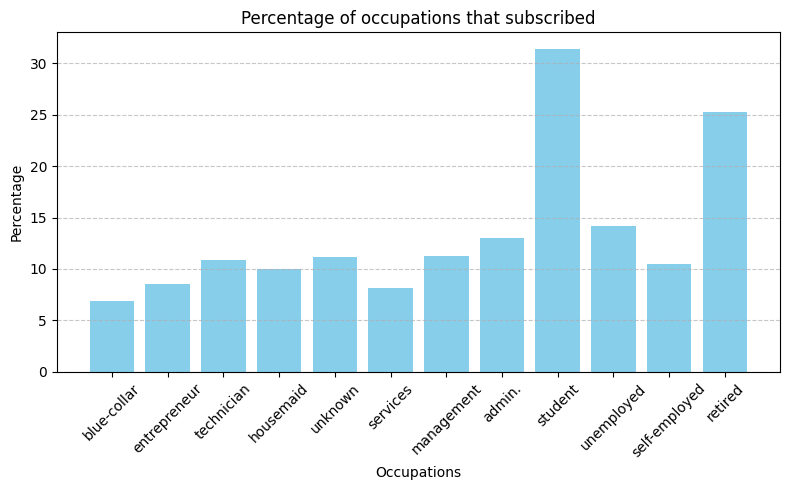

In [22]:
job_count2=Counter(df['job'])
job_count2
job_percentage = {
    key: job_y_count[key] / job_count2[key] * 100 
    for key in job_y_count 
    if key in job_count2 and job_count2[key] != 0
}

labels = list(job_percentage.keys())
values = list(job_percentage.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color='skyblue')
plt.title('Percentage of occupations that subscribed')
plt.xlabel('Occupations')
plt.ylabel('Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Students (31%) and retired clients (25%) are more likely to subscribe.

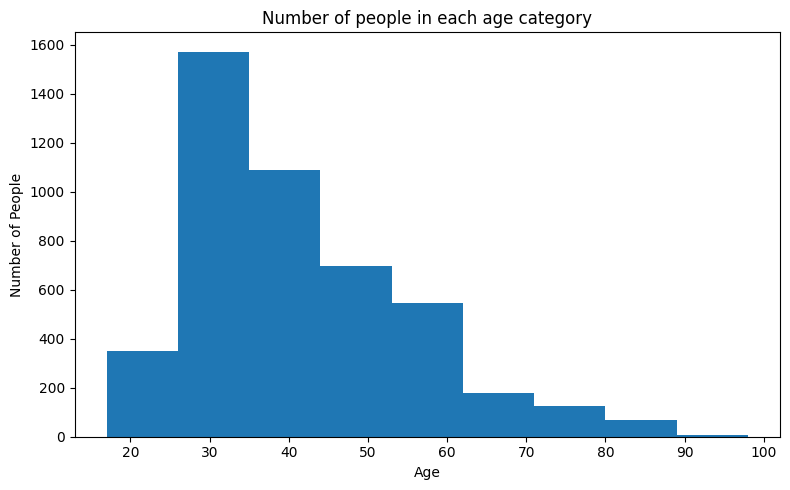

In [23]:
salaries_y=df_y['age']
plt.figure(figsize = (8,5))
plt.hist(salaries_y, bins = 9)
plt.title('Number of people in each age category')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

Highest number of subscribers are between ages 26-35, followed by ages 35-44 and ages 44-53.

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/1307783306.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=housing_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


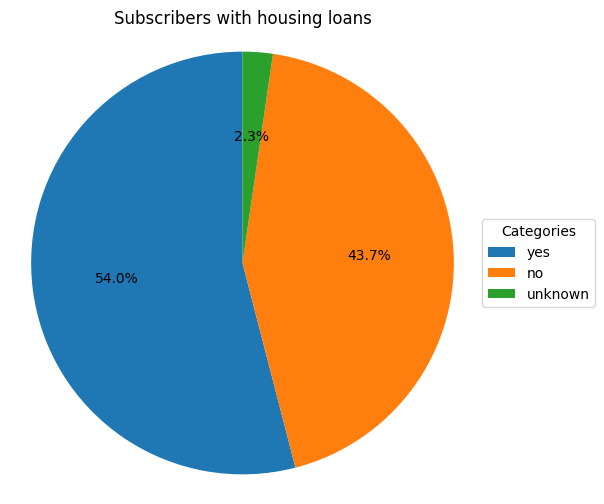

In [24]:
housing_y_count=Counter(df_y['housing'])
housing_y_count
housing_y_label = list(housing_y_count.keys())
housing_y_size = list(housing_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(housing_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=housing_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Subscribers with housing loans')
plt.axis('equal')
plt.show()

More than half of subscribers have housing loans. Housing loan is not a determining factor that influences the outcome.

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/2738049858.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=loan_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


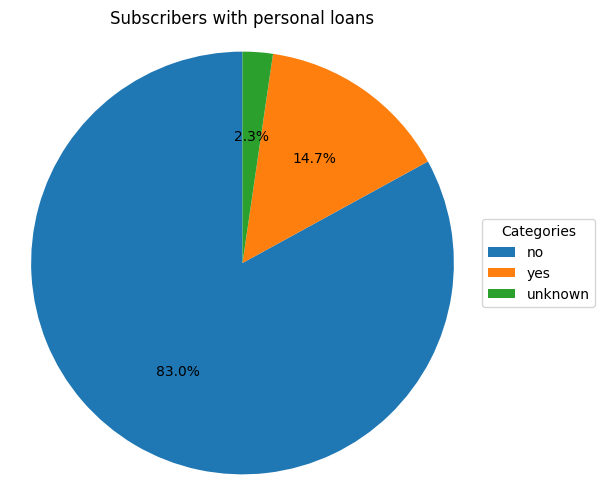

In [25]:
loan_y_count=Counter(df_y['loan'])
loan_y_count
loan_y_label = list(loan_y_count.keys())
loan_y_size = list(loan_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(loan_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=loan_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Subscribers with personal loans')
plt.axis('equal')
plt.show()

Majority of subscribers do not have personal loans. This indicates that there is a high chance of success if the client does not have a personal loan.

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/3559376009.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=marital_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


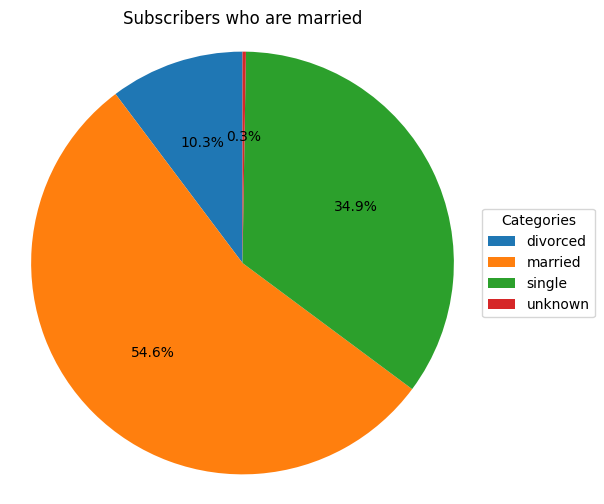

In [26]:
marital_y_count=Counter(df_y['marital'])
marital_y_count
marital_y_label = list(marital_y_count.keys())
marital_y_size = list(marital_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(marital_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=marital_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Subscribers who are married')
plt.axis('equal')
plt.show()

More than half of the subscribers are married.

In [27]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Average duration of successful call was 258 seconds or 4.3 minutes. Any calls longer or shorter than this will decrease the success rate.

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/3297060366.py:9: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=education_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


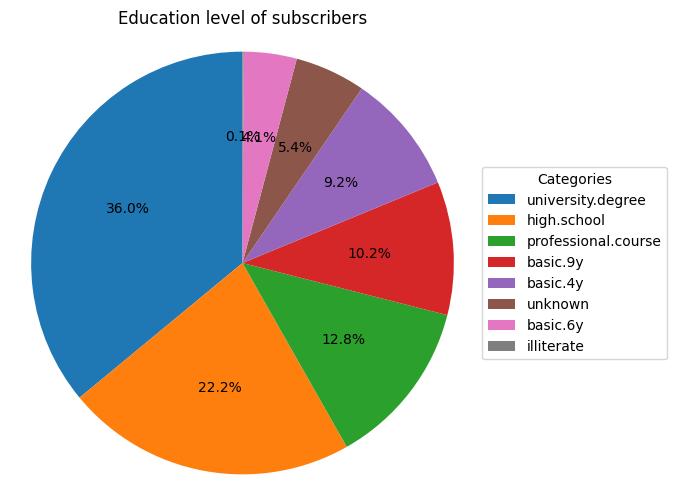

In [28]:
education_y_count=Counter(df_y['education'])
education_y_count
education_y_label = list(education_y_count.keys())
education_y_size = list(education_y_count.values())
sorted_data = sorted(zip(education_y_size, education_y_label), reverse=True)
education_y_size, education_y_label = zip(*sorted_data)
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(education_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=education_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Education level of subscribers')
plt.axis('equal')
plt.show()

36% of subscribers have a university degree, 22.2% are from high school, 12.8% have done a professional course. 

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/1771009063.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=campaign_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


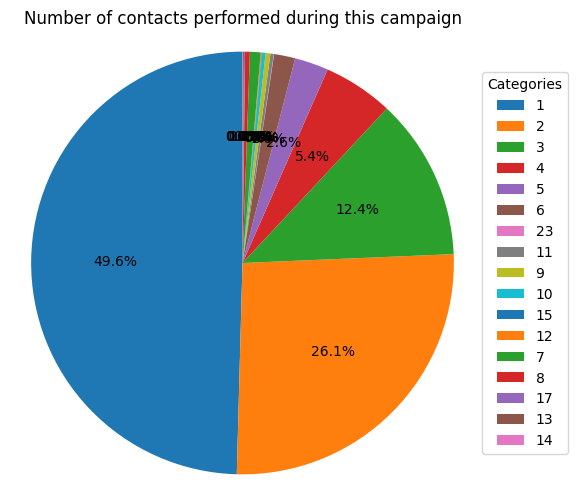

In [29]:
campaign_y_count=Counter(df_y['campaign'])
campaign_y_count
campaign_y_label = list(campaign_y_count.keys())
campaign_y_size = list(campaign_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(campaign_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=campaign_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Number of contacts performed during this campaign')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/2813670875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y['pdays']=df_y['pdays'].replace({999:0})
/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/2813670875.py:8: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=pdays_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


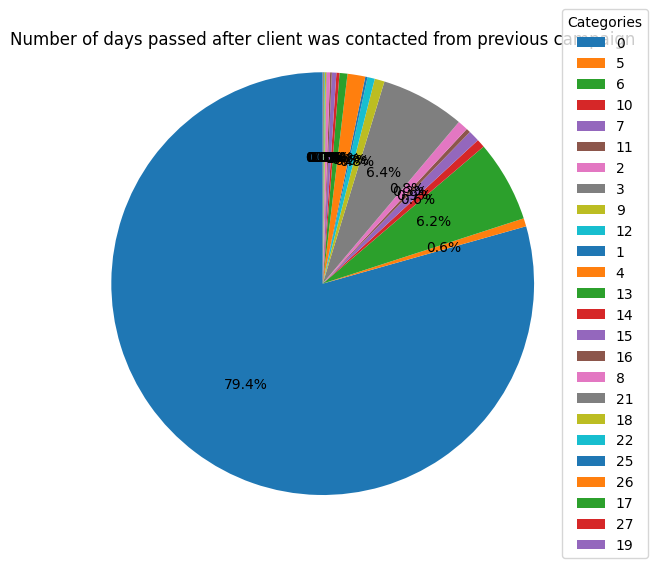

In [30]:
df_y['pdays']=df_y['pdays'].replace({999:0})
pdays_y_count=Counter(df_y['pdays'])
pdays_y_count
pdays_y_label = list(pdays_y_count.keys())
pdays_y_size = list(pdays_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(pdays_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=pdays_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Number of days passed after client was contacted from previous campaign')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/1490381578.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=previous_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


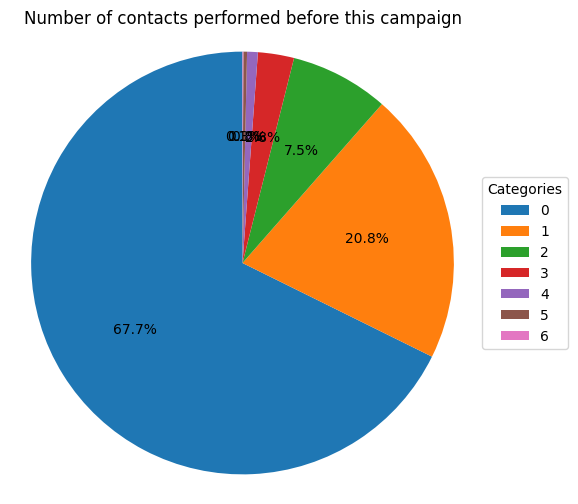

In [31]:
previous_y_count=Counter(df_y['previous'])
previous_y_count
previous_y_label = list(previous_y_count.keys())
previous_y_size = list(previous_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(previous_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=previous_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Number of contacts performed before this campaign')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/3363196064.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=poutcome_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


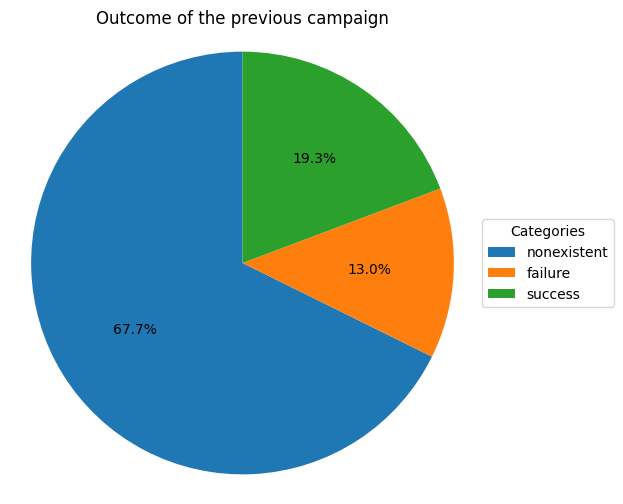

In [32]:
poutcome_y_count=Counter(df_y['poutcome'])
poutcome_y_count
poutcome_y_label = list(poutcome_y_count.keys())
poutcome_y_size = list(poutcome_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(poutcome_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=poutcome_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Outcome of the previous campaign')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/593639871.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=default_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


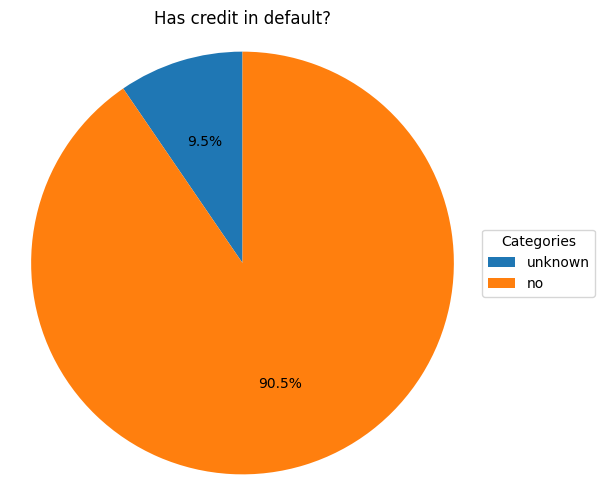

In [33]:
default_y_count=Counter(df_y['default'])
default_y_count
default_y_label = list(default_y_count.keys())
default_y_size = list(default_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(default_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=default_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Has credit in default?')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/1494016507.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=contact_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


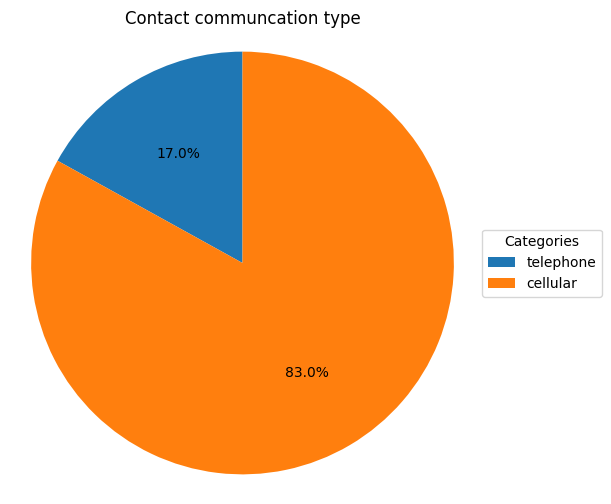

In [34]:
contact_y_count=Counter(df_y['contact'])
contact_y_count
contact_y_label = list(contact_y_count.keys())
contact_y_size = list(contact_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(contact_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=contact_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Contact communcation type')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/1718210502.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels= month_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


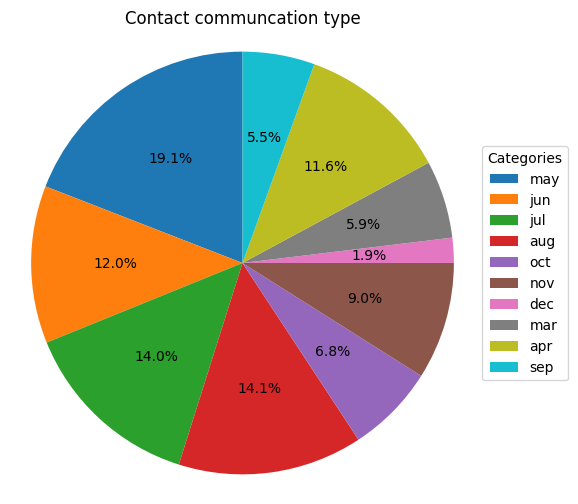

In [35]:
month_y_count=Counter(df_y['month'])
month_y_count
month_y_label = list(month_y_count.keys())
month_y_size = list(month_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(month_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels= month_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Contact communcation type')
plt.axis('equal')
plt.show()

/var/folders/3t/kqzykkfx49d7ljggm3b2fc3m0000gn/T/ipykernel_1562/1803494942.py:7: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(wedges, labels=day_of_week_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


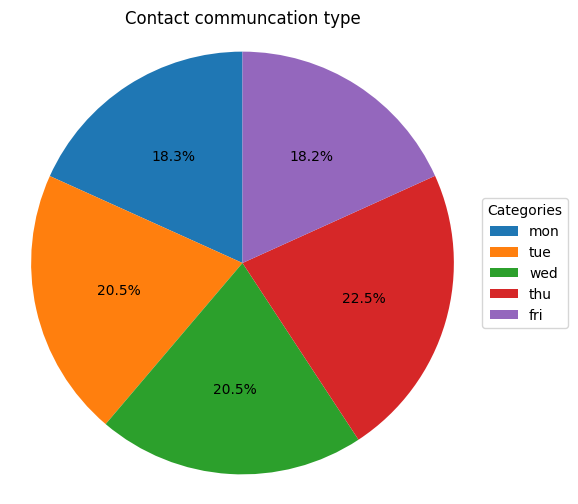

In [36]:
day_of_week_y_count=Counter(df_y['day_of_week'])
day_of_week_y_count
day_of_week_y_label = list(day_of_week_y_count.keys())
day_of_week_y_size = list(day_of_week_y_count.values())
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(day_of_week_y_size, autopct='%1.1f%%', startangle=90)
plt.legend(wedges, labels=day_of_week_y_label, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Contact communcation type')
plt.axis('equal')
plt.show()

In [37]:
df2=df.copy()
df2=df2.drop('day_of_week',axis=1)
df2

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [38]:
job_encoder= {'admin.': 1, 'blue-collar': 2, 'entrepreneur': 3, 'housemaid': 4, 'management': 5, 'retired': 6, 'self-employed': 7, 'services': 8, 'student': 9, 'technician': 10, 'unemployed': 11, 'unknown':0}
df2['job'] = df2['job'].map(job_encoder)
marital_encoder= {'divorced': 3, 'married': 2, 'single': 1, 'unknown': 0}
df2['marital'] = df2['marital'].map(marital_encoder)
education_encoder= {'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'illiterate': -1, 'professional.course': 5, 'university.degree': 6, 'unknown': 0}
df2['education'] = df2['education'].map(education_encoder)
df2['default'] = df2['default'].map({'yes': 1, 'no': -1, 'unknown': 0})
df2['housing'] = df2['housing'].map({'yes': 1, 'no': -1, 'unknown': 0})
df2['loan'] = df2['loan'].map({'yes': 1, 'no': -1, 'unknown': 0})
df2['contact'] = df2['contact'].map({'cellular': 2, 'telephone': 1, 'unknown': 0})
month_encoder= {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12, 'unknown': 0}
df2['month'] = df2['month'].map(month_encoder)
df2['poutcome'] = df2['poutcome'].map({'failure': -1, 'success': 1, 'nonexistent':2, 'unknown': 0})
df2['y'] = df2['y'].map({'yes': 1, 'no': -1, 'unknown': 0})
df2

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,2,1,-1,-1,-1,1,5,261,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,-1
1,57,8,2,4,0,-1,-1,1,5,149,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,-1
2,37,8,2,4,-1,1,-1,1,5,226,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,-1
3,40,1,2,2,-1,-1,-1,1,5,151,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,-1
4,56,8,2,4,-1,-1,1,1,5,307,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,5,-1,1,-1,2,11,334,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,2,2,5,-1,-1,-1,2,11,383,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,-1
41185,56,6,2,6,-1,1,-1,2,11,189,2,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,-1
41186,44,10,2,5,-1,-1,-1,2,11,442,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,1


In [39]:
#setting up the model
x= df2.drop(['y'], axis=1) 
y= df2['y'] 

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32950 entries, 12556 to 15795
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  int64  
 2   marital         32950 non-null  int64  
 3   education       32950 non-null  int64  
 4   default         32950 non-null  int64  
 5   housing         32950 non-null  int64  
 6   loan            32950 non-null  int64  
 7   contact         32950 non-null  int64  
 8   month           32950 non-null  int64  
 9   duration        32950 non-null  int64  
 10  campaign        32950 non-null  int64  
 11  pdays           32950 non-null  int64  
 12  previous        32950 non-null  int64  
 13  poutcome        32950 non-null  int64  
 14  emp.var.rate    32950 non-null  float64
 15  cons.price.idx  32950 non-null  float64
 16  cons.conf.idx   32950 non-null  float64
 17  euribor3m       32950 non-null  

In [42]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8238 entries, 32884 to 1871
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8238 non-null   int64  
 1   job             8238 non-null   int64  
 2   marital         8238 non-null   int64  
 3   education       8238 non-null   int64  
 4   default         8238 non-null   int64  
 5   housing         8238 non-null   int64  
 6   loan            8238 non-null   int64  
 7   contact         8238 non-null   int64  
 8   month           8238 non-null   int64  
 9   duration        8238 non-null   int64  
 10  campaign        8238 non-null   int64  
 11  pdays           8238 non-null   int64  
 12  previous        8238 non-null   int64  
 13  poutcome        8238 non-null   int64  
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   fl

In [43]:
results={}

In [44]:
#RandomForestClassifier model

from sklearn.ensemble import RandomForestClassifier

#Train the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9119932022335518
              precision    recall  f1-score   support

          -1       0.94      0.96      0.95      7303
           1       0.64      0.52      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238

